<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/practice_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


###**Loading Dataset**

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
train_data[0]
x = np.asarray(train_data[0])
x

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [0]:
len(np.unique(train_data[0]))
(np.unique(train_data[0]))
#np.unique(train_data[0]).dtype

array([   1,    2,    4,    5,    6,    7,    8,    9,   12,   13,   14,
         15,   16,   17,   18,   19,   21,   22,   25,   26,   28,   30,
         32,   33,   35,   36,   38,   39,   43,   46,   48,   50,   51,
         52,   56,   62,   65,   66,   71,   76,   77,   82,   87,   88,
         92,   98,  100,  103,  104,  106,  107,  112,  113,  117,  124,
        130,  134,  135,  141,  144,  147,  150,  167,  172,  173,  178,
        192,  194,  215,  224,  226,  256,  283,  284,  297,  316,  317,
        336,  381,  385,  386,  400,  407,  447,  458,  469,  476,  480,
        515,  530,  546,  619,  626,  670,  723,  838,  973, 1029, 1111,
       1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785,
       3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486])

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
train_labels[0]

1

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 1s 1us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

###**Preparing Data: Encoding the integer sequence/list into a binary matrix**

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

###**Building network: Model architecture/Definition**

In [0]:
from keras import models
from keras import layers

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

###**Building network: Compiling the model**

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


###**Validation approach**

Dividing Training data into Training and Validation sets:

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Traing Model with Training and Validation sets:

In [10]:
history = model.fit(partial_x_train, partial_y_train, batch_size= 512, epochs= 20, validation_data= (x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 6s 379us/step - loss: 0.4935 - acc: 0.7995 - val_loss: 0.3749 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.2988 - acc: 0.9029 - val_loss: 0.3005 - val_acc: 0.8881
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2229 - acc: 0.9259 - val_loss: 0.2861 - val_acc: 0.8851
Epoch 4/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1744 - acc: 0.9447 - val_loss: 0.3009 - val_acc: 0.8776
Epoch 5/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1412 - acc: 0.9562 - val_loss: 0.2802 - val_acc: 0.8890
Epoch 6/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1169 - acc: 0.9638 - val_loss: 0.2946 - val_acc: 0.8877
Epoch 7/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.0963 - acc: 0.9707 - val_loss: 0.3111 

Plotting Training and Validation Loss:

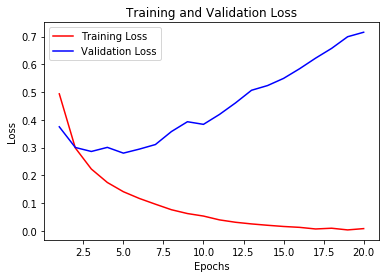

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting Training and Validation Accuracy:

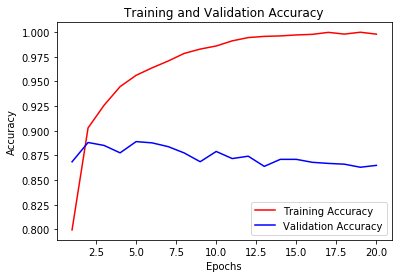

In [12]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###**Retraining new Models from scratch:**

In [13]:
model1 = models.Sequential()

model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model1.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.4672 - acc: 0.8234
Epoch 2/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2710 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2067 - acc: 0.9271
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step
[0.29228190137386323, 0.8834]


**Model with more hidden units in layers:**

In [0]:
model2 = models.Sequential()

model2.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.5171 - acc: 0.7921
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.3070 - acc: 0.9006
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2285 - acc: 0.9227
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step
[0.28180060517311095, 0.88832]


**Model with different Loss function:**

In [0]:
model3 = models.Sequential()

model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.1544 - acc: 0.8192
Epoch 2/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.0814 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.0600 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step
[0.08823470275044441, 0.88068]


**Model with different Activation function:**

In [0]:
model4 = models.Sequential()

model4.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=4, batch_size=512)
results = model4.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.4249 - acc: 0.8260
Epoch 2/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.2369 - acc: 0.9155
Epoch 3/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.1788 - acc: 0.9346
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step
[0.31866204594135283, 0.878]


**Model with additional layers:**

In [0]:
model5 = models.Sequential()

model5.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=4, batch_size=512)
results = model5.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.4846 - acc: 0.8138
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2687 - acc: 0.9081
Epoch 3/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.2033 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step
[0.30506286395072935, 0.88032]


###Models with Regularization

In [0]:
from keras import regularizers

model6 = models.Sequential()
model6.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model6.fit(partial_x_train, partial_y_train, batch_size= 512, epochs= 20, validation_data= (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.5846 - acc: 0.7589 - val_loss: 0.4695 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3960 - acc: 0.8935 - val_loss: 0.3923 - val_acc: 0.8694
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.3158 - acc: 0.9159 - val_loss: 0.3530 - val_acc: 0.8838
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2745 - acc: 0.9272 - val_loss: 0.3398 - val_acc: 0.8829
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2468 - acc: 0.9378 - val_loss: 0.3304 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2252 - acc: 0.9455 - val_loss: 0.3352 - val_acc: 0.8842
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2149 - acc: 0.9472 - val_loss: 0.3405 - val_ac

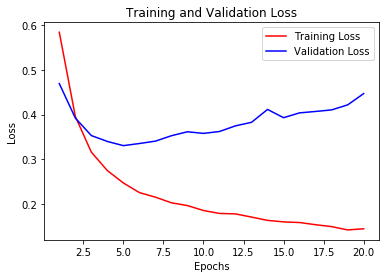

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()